In [1]:
import requests 
import json
from requests.structures import CaseInsensitiveDict

In [2]:
TWEET_LOOKUP_URL = 'https://api.twitter.com/1.1/search/tweets.json'

bearer_token = 'Bearer AAAAAAAAAAAAAAAAAAAAAAhFbAEAAAAAYPtbu4i%2BmiRs2gmyt8IIGFtgAq0%3DKC9ImZP2InkVVDBoEqYhRs4ZVCUgFBrwcqaRw69CQKgUuLuKUW'
headers = CaseInsensitiveDict()
headers["Authorization"] = bearer_token

In [3]:
class tweet_obj:
  def __init__(self, id, likes, retweets):
    self.id = id
    self.likes = likes
    self.retweets = retweets
    
class user_obj:
  def __init__(self, id, screen_name, name, location, description, url, followers, following, verified, profile_image_url, background_image_url, post_id):
    self.id = id
    self.screen_name = screen_name
    if name == None:
        self.name = ""
    else: self.name = name
    self.location = location
    self.description = description
    self.url = url
    self.followers = followers
    self.following = following
    self.verified = verified
    self.profile_image_url = profile_image_url
    self.background_image_url = background_image_url       
    self.post_id = post_id

In [4]:
def getTweets(arr_tweets, arr_users, payloads):
    try:
        r = requests.get(TWEET_LOOKUP_URL, headers = headers, params = payload)
        if(r.status_code == 200):
            print("status code : 200")
            tweets_json = json.loads(r.text)['statuses']
            for a in tweets_json:
                tweet_object = tweet_obj(a['id_str'], a['favorite_count'], a['retweet_count'])
                user_object = user_obj(a['user']['id'], a['user']['screen_name'], a['user']['name'], a['user']['location'], a['user']['description'], a['user']['url'], a['user']['followers_count'], a['user']['friends_count'], a['user']['verified'], a['user']['profile_image_url'], a['user']['profile_background_image_url'], a['id_str'])
                arr_tweets.append(tweet_object)
                arr_users.append(user_object)
            if 'next_results' in json.loads(r.text)['search_metadata'] :
                
                if json.loads(r.text)['search_metadata']['next_results'] is not None or "":
                    
                    payload_str = json.loads(r.text)['search_metadata']['next_results']
                    payload_str_1 = ((payload_str)[1:]).split("&")
                    new_payload = {'max_id':payload_str_1[0].split("=")[1], 'q':payload_str_1[1].split("=")[1], 'count':100, 'include_entities':1}
                    getTweets(arr_tweets, arr_users, new_payload)
                else: print("next page is none or empty")
            else : print("No more next page ")
        else: print("Error response code: "+ str(r.status_code))
    except Exception as e:
        
        print("Error please try again later e :"+ str(e))

In [5]:
fake_news = []
fake_news_user = []
real_news = []
real_news_user = []

payload_fake = ['jahangirpuri saffron mosque -refuted -no -false -fake -rubbished -denies', 'farmers want article 370 until:2020-12-6 since:2020-11-01', 'vaccine dangerous (covid OR corona OR coronavirus) -false -fake -fact','CSK  (Fixing OR Banned OR Cheating OR Corruption OR Corrupt) until:2014-07-21 since:2014-03-14 -refuted -no -false -fake -rubbished -denies', 'Capture J&K by BJP, Removal of Article 370 is a wrong decision -false -fake -fact']
payload_real = ['jahangirpuri saffron mosque (denial OR refuted OR no OR false OR fake OR rubbished OR denies)', 'farmers want article 370 (false OR fake OR fact OR true OR 2019 OR shirmoani akali dal) -modi -bjp -congress', 'vaccine is safe (Covid OR Coronavirus OR corona)', 'CSK player are not corrupt. None of the team members of CSK and RR is included in scam Justice for Dhoni until:2014-07-21 since:2014-03-14 ', 'Removal of Article 370 is a wright decision until:16-02-2020 since:16-01-2020']

In [6]:
for query in payload_fake:
    payload = {'q':query, 'count':'100'}
    getTweets(fake_news, fake_news_user, payload)

status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status cod

status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status cod

status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status cod

status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status cod

In [8]:
for query in payload_real:
    payload = {'q':query, 'count':'100'}
    getTweets(real_news, real_news_user, payload)

status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status cod

status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status code : 200
status cod

In [9]:
print(len(fake_news))
print(len(real_news))
print(len(fake_news_user))
print(len(real_news_user))

150900
74300
150900
74300


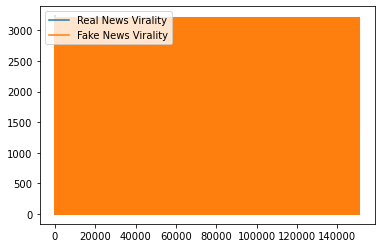

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y_real = []
y_fake = []

for t in fake_news:
    y_fake.append(t.likes+t.retweets)
    
for idx, t in enumerate(real_news):
    if idx == 100:
        break
    y_real.append(t.likes+t.retweets)

plt.plot(y_real)
plt.plot(y_fake)
plt.legend(['Real News Virality', 'Fake News Virality'], loc = 'upper left')
plt.show()

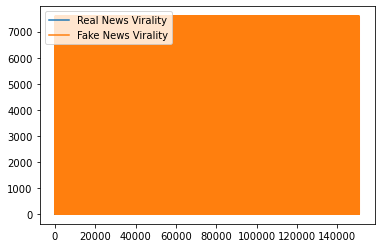

In [14]:
virality_fake = []
virality_real = []
for w in fake_news_user:
    virality_fake.append(w.followers)
for o in real_news_user:
    virality_real.append(o.followers)

plt.plot(virality_real)
plt.plot(virality_fake)
plt.legend(['Real News Virality', 'Fake News Virality'], loc = 'upper left')
plt.show()
    

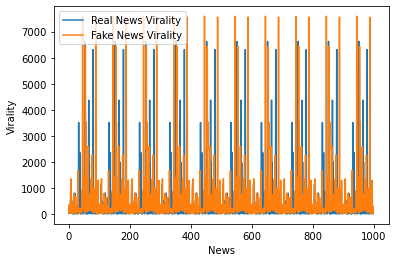

In [31]:
virality_fake_1 = []
virality_real_1 = []
for idx, w in enumerate(fake_news_user):
    if idx == 1000:
        break
    virality_fake_1.append(w.followers)
for idx, o in enumerate(real_news_user):
    if idx == 1000:
        break
    virality_real_1.append(o.followers)

plt.plot(virality_real_1)
plt.plot(virality_fake_1)
plt.legend(['Real News Virality', 'Fake News Virality'], loc = 'upper left')
plt.xlabel('News', fontsize=10)
plt.ylabel('Virality', fontsize=10)
plt.show()

In [16]:
print(sum(virality_fake))
print(sum(virality_real))
print("Fake news travels -> more faster than real news")
print(sum(virality_fake)/sum(virality_real))


94855240
31256659
Fake news travels -> more faster than real news
3.034721017367851


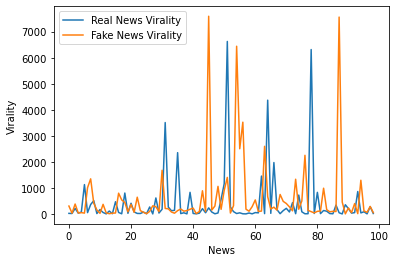

In [37]:
virality_fake = []
virality_real = []
virality_users = []
virality_users_real = []
for w in fake_news_user:
    if w.id not in virality_users:
        virality_fake.append(w.followers)
        virality_users.append(w.id)
    
for o in real_news_user:
    if o.id not in virality_users_real:
        virality_real.append(o.followers)
        virality_users_real.append(o.id)

plt.plot(virality_real)
plt.plot(virality_fake)
plt.legend(['Real News Virality', 'Fake News Virality'], loc = 'upper left')
plt.xlabel('News', fontsize=10)
plt.ylabel('Virality', fontsize=10)
plt.show()

In [18]:
print(virality_fake)
print(virality_real)
print("Fake news travels -> more faster than real news")
print((sum(virality_fake)/sum(virality_real)))

60612
20997.5
Fake news travels -> more faster than real news
5.511468013106301


In [40]:
#Now we will try finding out the factors responsible behind this

#1) Humans vs bots

def compare_string(name, username):
    uname = len(username)
    n = len(name)
    for a in name:
        for b in username:
            if b == a:
                n = n-1
                
    if (len(name)-n)<=(len(name)/2):
        return True
    else :
        return False
    
def compare_following(followers, following):
    if not a.verified:
        if followers<=10 and following>=500:
            return 
        
#TODO Complete        
def compare_tweets_data(id):
    user_timeline_url = 'https://api.twitter.com/1.1/statuses/user_timeline.json'
    payload = {'id':id}
    r = requests.get(user_timeline_url, headers = headers, params = payload)
    if r.status_code == 200:
        jsonStr = json.loads(r.text)[0]
        
        

fake_user_count_f = 0
fake_user_count_r = 0
fake_user_f_index = []
fake_user_r_index = []

for idx, a in enumerate(fake_news_user):
    points = 0
    if a.profile_image_url is None or "":
        points = points+1
    if a.background_image_url is None or "":
        points = points+1
    if compare_string(a.name , a.screen_name):
        points = points+1
    if compare_following(a.followers, a.following):
        points = points+1
    if a.verified:
        points = points-1
    
    if points >= 2:
        fake_user_count_f = fake_user_count_f+1
        fake_user_f_index.append(idx)
        
for idx, a in enumerate(real_news_user):
    points = 0
    if a.profile_image_url is None or "":
        points = points+1
    if a.background_image_url is None or "":
        points = points+1
    if compare_string(a.name , a.screen_name):
        points = points+1
    if compare_following(a.followers, a.following):
        points = points+1
    if a.verified:
        points = points-1
    
    if points >= 2:
        fake_user_count_r = fake_user_count_r+1
        fake_user_r_index.append(idx)
    
        

print("Total Bots Responsible for tweeting content in Real News :"+ str(fake_user_count_r) )
print("Total Bots Responsible for tweeting content in Fake News :"+ str(fake_user_count_f) )   

        

Total Bots Responsible for tweeting content in Real News :11888
Total Bots Responsible for tweeting content in Fake News :21126


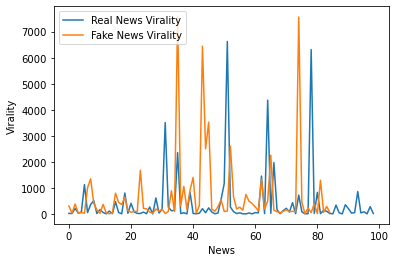

In [42]:
virality_fake = []
virality_real = []
virality_users = []
virality_users_real = []
for idx,w in enumerate(fake_news_user):
    if w.id not in virality_users and idx not in fake_user_f_index:
        virality_fake.append(w.followers)
        virality_users.append(w.id)
    
for o in real_news_user:
    if o.id not in virality_users_real and idx not in fake_user_r_index:
        virality_real.append(o.followers)
        virality_users_real.append(o.id)

plt.plot(virality_real)
plt.plot(virality_fake)
plt.xlabel('News', fontsize=10)
plt.ylabel('Virality', fontsize=10)
plt.legend(['Real News Virality', 'Fake News Virality'], loc = 'upper left')

plt.show()

In [107]:
print(virality_fake)
print(virality_real)
print("Fake news travels -> more faster than real news")
print((sum(virality_fake)/sum(virality_real)))

56986
20656.0
Fake news travels -> more faster than real news
6.27140487431415


In [32]:
import plotly.graph_objects as go

import networkx as nx


listOfIds_Followers = []

GET_FOLLOWERS_URL  = "https://api.twitter.com/1.1/followers/ids.json"

for a in fake_news_user:
    ids = []
    foll = []
    payload = {'user_id':a.id}
    r = requests.get(GET_FOLLOWERS_URL, headers = headers, params = payload)
    if r.status_code == 200:
        ids.append(a.id)
        foll.append(str(json.loads(r.text)["ids"]).split(","))
        listOfIds_Followers.append(ids)
        listOfIds_Followers.append(foll)
    else: print("Error : status code : "+str(r.status_code))


G = nx.from_numpy_array(listOfIds_Followers)
from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(G)
net.show("Example.html")

Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : status code : 429
Error : stat

KeyboardInterrupt: 

In [99]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(G)
net.show("Example.html")

In [ ]:
#Psychological factors where we will see the user history the groups he has joined and previous tweets his users info and all
#and decide whether a user is polar or not towards a particular topic
#TODO: Draw Beta-Skeleton Graph of a Post Virality

In [77]:
import time
import tweepy

auth = tweepy.OAuthHandler("GOWNa0Ux5nFPHAi49S3Po1bS0", "oMgQHGCzQkMaT1ERr9dZKG6r4puq0eR2fbXjqBM72DjUwzAE01")
auth.set_access_token("1513250263-nlU9URwFZJ7MaVyIgqBb1LDET9EaHjScKTDeaPy", "Jw47YRVjJHoUrXYgqwG4EnI46vT7dnb7zPEO9UqqTMsP0")
api = tweepy.API(auth)
followers =  []
for page in tweepy.Cursor(api.get_follower_ids, screen_name=fake_news_user[0].screen_name).pages():
    followers.extend(page)
    time.sleep(60)
len(followers)

302

In [78]:
followers1 =  []
for page in tweepy.Cursor(api.get_follower_ids, screen_name=fake_news_user[1].screen_name).pages():
    followers1.extend(page)
    time.sleep(60)
print("Followers 1 : "+str(len(followers1)))
followers2 = []
for page in tweepy.Cursor(api.get_follower_ids, screen_name=fake_news_user[2].screen_name).pages():
    followers2.extend(page)
    time.sleep(60)
print("Followers 2: "+str(len(followers2)))

Followers 1 : 31
Followers 2: 380


NameError: name 'followers3' is not defined

In [79]:
followers3 = []
for page in tweepy.Cursor(api.get_follower_ids, screen_name=fake_news_user[3].screen_name).pages():
    followers3.extend(page)
    time.sleep(60)
print("Followers 3: "+str(len(followers3)))
followers4 = []
for page in tweepy.Cursor(api.get_follower_ids, screen_name=fake_news_user[4].screen_name).pages():
    followers4.extend(page)
    time.sleep(60)
print("Followers 4: "+str(len(followers3)))

Followers 3: 36
Followers 4: 36


In [82]:
print("Follower 4: "+ str(len(followers4)))

Follower 4: 51


In [83]:
pip install itertools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [87]:
from itertools import repeat
userID1 = fake_news_user[0]
new_list_1=[]
new_list_1.extend(repeat(userID1, len(followers)))
print(len(new_list_1))

userID2 = fake_news_user[1]
new_list_2=[]
new_list_2.extend(repeat(userID2, len(followers1)))
print(len(new_list_2))

userID3 = fake_news_user[2]
new_list_3=[]
new_list_3.extend(repeat(userID3, len(followers2)))
print(len(new_list_3))

userID4 = fake_news_user[3]
new_list_4=[]
new_list_4.extend(repeat(userID4, len(followers3)))
print(len(new_list_4))

userID5 = fake_news_user[4]
new_list_5=[]
new_list_5.extend(repeat(userID5, len(followers4)))
print(len(new_list_5))

302
31
380
36
51


In [88]:
user_id_final = new_list_1 + new_list_2 + new_list_3 + new_list_4 + new_list_5
followers_final = followers + followers1 + followers2 + followers3 + followers4
print(len(user_id_final))
print(len(followers_final))

800
800


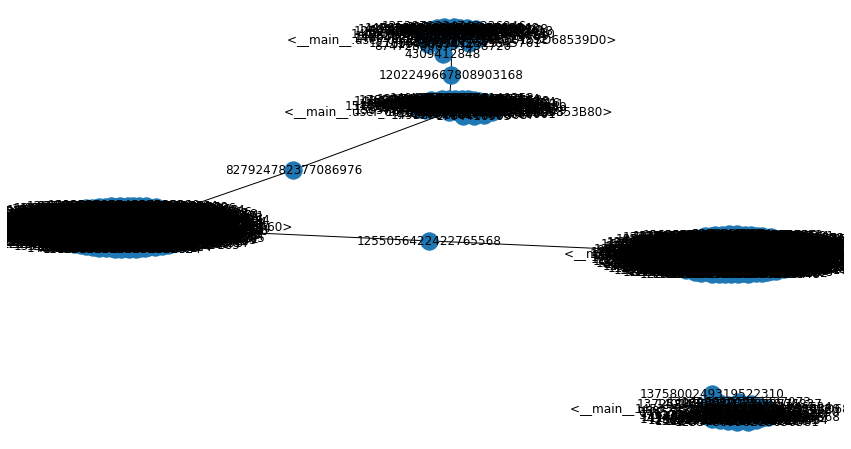

In [90]:
import pandas as pd
fig, ax = plt.subplots(figsize=(15,8))

relationships = pd.DataFrame({'from': user_id_final, 
                              'to':   followers_final})

G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

nx.draw(G, with_labels=True)

In [56]:
import time
import tweepy

auth = tweepy.OAuthHandler("GOWNa0Ux5nFPHAi49S3Po1bS0", "oMgQHGCzQkMaT1ERr9dZKG6r4puq0eR2fbXjqBM72DjUwzAE01")
auth.set_access_token("1513250263-nlU9URwFZJ7MaVyIgqBb1LDET9EaHjScKTDeaPy", "Jw47YRVjJHoUrXYgqwG4EnI46vT7dnb7zPEO9UqqTMsP0")

api = tweepy.API(auth)
followers =  []
user_id = []
for idx, user in enumerate(fake_news_user):
    if idx == 10:
        break
    flw = 0
    for page in tweepy.Cursor(api.get_follower_ids, screen_name=user.screen_name).pages():
        followers.extend(page)
        flw = len(followers) - flw
        time.sleep(60)
        print("flw :"+str(flw))
    
    for i in range(0, flw-1):
        user_id.append(user.id)
    
    print(len(followers))
    print("Length of User ID array: "+str(len(user_id)))
    print("Length of User Followers array: "+str(len(followers)))
    

print(len(user_ids))
print(len(followers))

flw :302
302
Length of User ID array: 301
Length of User Followers array: 301
flw :333
333
Length of User ID array: 633
Length of User Followers array: 633
flw :711
711
Length of User ID array: 1343
Length of User Followers array: 1343
flw :747
747
Length of User ID array: 2089
Length of User Followers array: 2089
flw :798
798
Length of User ID array: 2886
Length of User Followers array: 2886
flw :829
829
Length of User ID array: 3714
Length of User Followers array: 3714
flw :1836
1836
Length of User ID array: 5549
Length of User Followers array: 5549
flw :3179
3179
Length of User ID array: 8727
Length of User Followers array: 8727
flw :3587
3587
Length of User ID array: 12313
Length of User Followers array: 12313
flw :3738
3738
Length of User ID array: 16050
Length of User Followers array: 16050
32
31


In [67]:
len(user_id)
len(followers)

3738

In [75]:
temp = user_id[3737]
res = user_id[:3738]
len(res)

3738

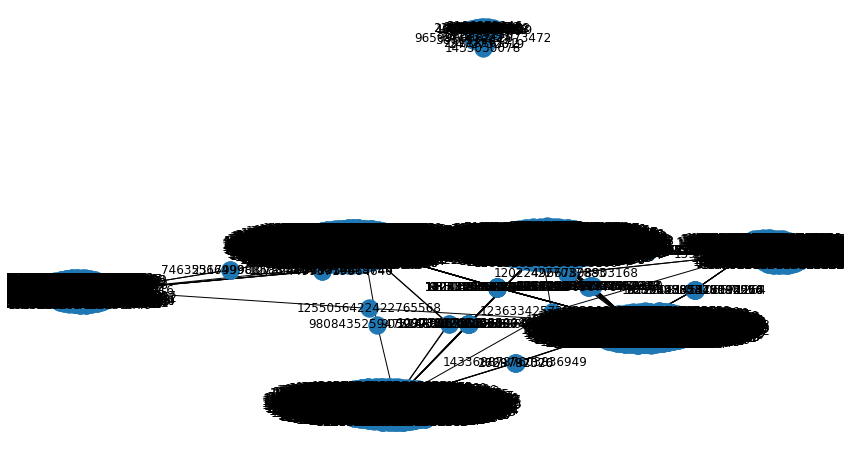

In [76]:
import pandas as pd
fig, ax = plt.subplots(figsize=(15,8))

relationships = pd.DataFrame({'from': res, 
                              'to':   followers})

G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

nx.draw(G, with_labels=True)

In [59]:
len(user_ids)
len(user_followers)

31

In [53]:
arr_new_f = []
    

31


In [55]:
listOfIds_Followers_f = []
G = nx.from_numpy_array(np.array(arr_new_f, dtype=object))
from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(G)
net.show("Example.html")

NetworkXError: Adjacency matrix not square: nx,ny=(31, 2)

In [ ]:
import time
import tweepy

auth = tweepy.OAuthHandler("GOWNa0Ux5nFPHAi49S3Po1bS0", "oMgQHGCzQkMaT1ERr9dZKG6r4puq0eR2fbXjqBM72DjUwzAE01")
auth.set_access_token("1513250263-nlU9URwFZJ7MaVyIgqBb1LDET9EaHjScKTDeaPy", "Jw47YRVjJHoUrXYgqwG4EnI46vT7dnb7zPEO9UqqTMsP0")

api = tweepy.API(auth)

user_followers_r = []
user_ids_r=[]
for idx, user in enumerate(real_news_user):
    if idx == 100:
        break
    user_ids_r.append(user.id)
    followers = []
    for page in tweepy.Cursor(api.get_follower_ids, screen_name=user.screen_name).pages():
        followers.extend(page)
        time.sleep(60)
    user_followers_r.append(followers)
    print(len(followers))

print(len(user_ids_r))
print(len(user_followers_r))

In [ ]:
listOfIds_Followers_r = []
G = nx.from_numpy_array(listOfIds_Followers_r)
from pyvis.network import Network
net = Network(notebook = True)
net.from_nx(G)
net.show("Example.html")

In [91]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: click in c:\users\lenovo\anaconda3\lib\site-packages (from nltk>=3.1; python_version >= "3"->textblob) (7.1.2)



In [103]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

auth = tweepy.OAuthHandler("GOWNa0Ux5nFPHAi49S3Po1bS0", "oMgQHGCzQkMaT1ERr9dZKG6r4puq0eR2fbXjqBM72DjUwzAE01")
auth.set_access_token("1513250263-nlU9URwFZJ7MaVyIgqBb1LDET9EaHjScKTDeaPy", "Jw47YRVjJHoUrXYgqwG4EnI46vT7dnb7zPEO9UqqTMsP0")

api = tweepy.API(auth)

#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = 'jahangirpuri saffron mosque -refuted -no -false -fake -rubbished -denies'
noOfTweet = 200


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\lenovo/nltk_data'
    - 'C:\\Users\\lenovo\\anaconda3\\nltk_data'
    - 'C:\\Users\\lenovo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\lenovo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [100]:
pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=b87133ec38c53ff7f265431e47dbbbfb31335cbef92e35798f3b002993030d75
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [110]:

import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
  
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
        consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
        access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
        access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
  
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search_tweets(q = query, count = count)
  
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
  
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            # return parsed tweets
            return tweets
  
        except :
            # print error (if any)
            print("Error : " )
  
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'Donald Trump', count = 200)
  
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
  
if __name__ == "__main__":
    # calling main function
    main()

Error : 


TypeError: 'NoneType' object is not iterable

In [116]:

#import SentimentIntensityAnalyzer class
#from vaderSentiment.vaderSentiment module.


#fetch tweets 
tweet_content = []

for a in fake_news:
    payload = {'id':a.id}
    r = requests.get('https://api.twitter.com/2/tweets/:id', headers = headers, params = payload)
    if(r.status_code == 200):
        print("status code : 200")
        tweet_content.append(json.loads(r.text)['data']['text'])
            
            
    

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.


    
    

def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
        
total_sentiment_score = 0
for a in tweet_content:
    total_sentiment_score = total_sentiment_score + sentiment_scores(a)

g = total_sentiment_score / len(twitter_content)

print(g)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [112]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.
